In [20]:
import requests
import pandas as pd
import numpy as np
import urllib
import zipfile


from __future__ import print_function, division
import matplotlib.pylab as pl
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style('whitegrid')
import json
import geopandas as gpd
import fiona
import shapely

import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
url = 'http://www.nyc.gov/html/dot/downloads/misc/all_truck_routes_nyc.zip'
urllib.urlretrieve (url, "all_truck_routes_nyc.zip")

('all_truck_routes_nyc.zip',
 <httplib.HTTPMessage instance at 0x000000001307A348>)

In [26]:
zip_ref = zipfile.ZipFile("all_truck_routes_nyc.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [3]:
truckRoute = gpd.GeoDataFrame.from_file('All_Truck_Routes_NYC_Lion14A/All_Truck_Routes_NYC_Lion14A.shp')
print(truckRoute.shape)
truckRoute.head()

(31641, 122)


,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,...,Restrictio,NYC_Reg,LtdLocal,ThruExwy,LocalBrg,LocalTunl,ThruBrg,ThruTunl,Shape_Leng,geometry
0,1,TRINITY PLACE,,0,U,,B,,W,DOT,...,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",,,,,,,61.384654,LINESTRING (980855.2233999968 197527.154599994...
1,2,WATER STREET,,0,U,,B,,T,DOT,...,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",,,,,,,243.748254,LINESTRING (980827.5365999937 195309.728000000...
2,3,CHURCH STREET,WTC TRANSPORTATION HUB,0,U,,B,,W,DOT,...,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",,,,,,,210.108985,LINESTRING (981255.6492000073 198319.495399996...
3,4,BROADWAY,,0,U,,B,,A,DOT,...,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",,,,,,,87.212873,LINESTRING (981196.9813999981 197436.590399995...
4,5,HOLLAND TUNNEL EXIT,,0,E,,B,V,W,DCP,...,"Height- 12'6"" Width- 8'0""","NYCDOT Traffic Rules, Section 4-13-(d)(1)",,,,,,,265.911867,LINESTRING (981458.8278000057 203429.914800003...


In [6]:
list(truckRoute.columns)

['OBJECTID',
 'Street',
 'SAFStreetN',
 'FeatureTyp',
 'SegmentTyp',
 'IncExFlag',
 'RB_Layer',
 'NonPed',
 'TrafDir',
 'TrafSrc',
 'SpecAddr',
 'FaceCode',
 'SeqNum',
 'StreetCode',
 'SAFStreetC',
 'LGC1',
 'LGC2',
 'LGC3',
 'LGC4',
 'LGC5',
 'LGC6',
 'LGC7',
 'LGC8',
 'LGC9',
 'BOE_LGC',
 'SegmentID',
 'SegCount',
 'LocStatus',
 'LZip',
 'RZip',
 'LBoro',
 'RBoro',
 'L_CD',
 'R_CD',
 'LATOMICPOL',
 'RATOMICPOL',
 'LCT2010',
 'LCT2010Suf',
 'RCT2010',
 'RCT2010Suf',
 'LCB2010',
 'LCB2010Suf',
 'RCB2010',
 'RCB2010Suf',
 'LCT2000',
 'LCT2000Suf',
 'RCT2000',
 'RCT2000Suf',
 'LCB2000',
 'LCB2000Suf',
 'RCB2000',
 'RCB2000Suf',
 'LCT1990',
 'LCT1990Suf',
 'RCT1990',
 'RCT1990Suf',
 'LAssmDist',
 'LElectDist',
 'RAssmDist',
 'RElectDist',
 'SplitElect',
 'LSchlDist',
 'RSchlDist',
 'SplitSchl',
 'LSubSect',
 'RSubSect',
 'SanDistInd',
 'MapFrom',
 'MapTo',
 'BoroBndry',
 'MH_RI_Flag',
 'XFrom',
 'YFrom',
 'XTo',
 'YTo',
 'ArcCenterX',
 'ArcCenterY',
 'CurveFlag',
 'Radius',
 'NodeIDFrom',

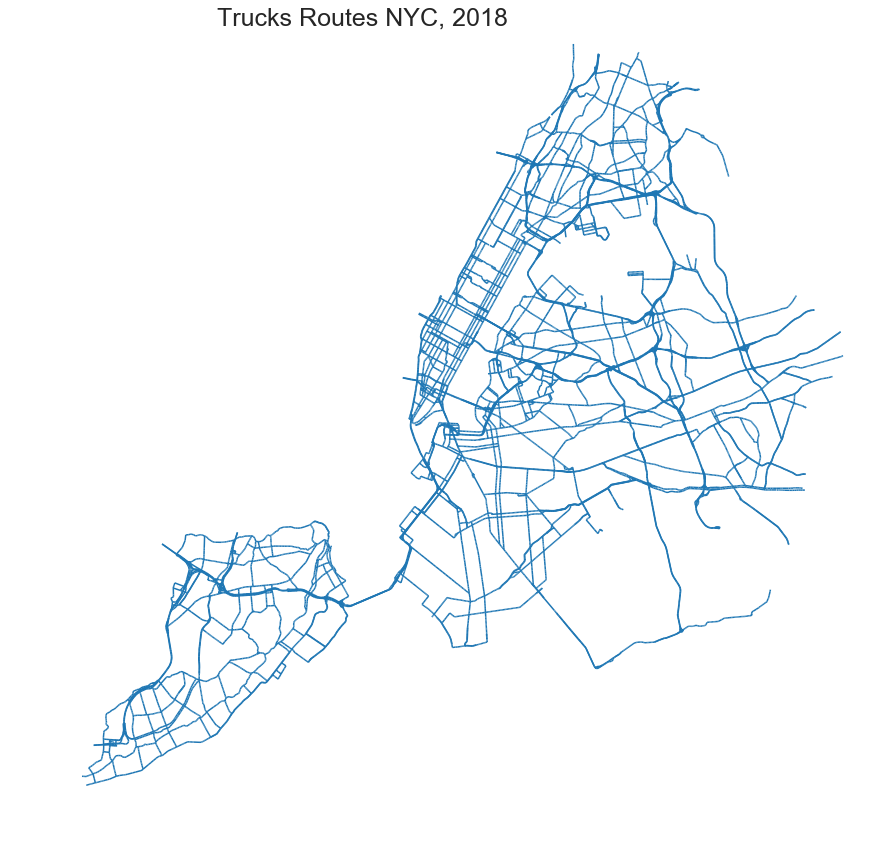

In [9]:
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(111)
truckRoute.plot(ax=ax)
plt.title('Trucks Routes NYC, 2018', size=25, y=.97, x=0.38)
tmp = ax.axis('off')